# Nyquist sampling overview
To demonstrate the Nyquist sampling frequency and aliasing, we will first create data that is sampled at a very fast rate, so we can be sure that the signal is well constructed. For a 50 Hz signal, we will create a sine wave sampled at 1 kHz over a duration of 0.3 s.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
frequency = 50
duration = 1

time = np.arange(0, duration, 1 / 1000)
original_signal = np.sin(2 * np.pi * time * frequency)

We want to see what the measurement looks like if we sample above, at, and below the nyquist rate of twice the signal frequency. Here we create data sampled at 0.8X, 2X, and 3X the signal frequency.

In [2]:
nyquist_rate = 2 * frequency 
below_nyquist_rate = 0.8 * frequency 
above_nyquist_rate = 3 * frequency 

t_nyquist = np.arange(0, duration, 1 / nyquist_rate)
t_above_nyquist = np.arange(0, duration, 1 / above_nyquist_rate)
t_below_nyquist = np.arange(0, duration, 1 / below_nyquist_rate)

sampled_signal_nyquist = np.sin(2 * np.pi * frequency * t_nyquist)
sampled_signal_above_nyquist = np.sin(2 * np.pi * frequency * t_above_nyquist)
sampled_signal_below_nyquist = np.sin(2 * np.pi * frequency * t_below_nyquist)

Next, we need to FFT the signal to extract the frequency contents. First, we can get the frequency array that goes with our FFT data using the `np.fft.fftfreq`. Then, we calculate the FFT of the signal using `np.fft.fft`. Note that this is not the fastest FFT function in Python, but it is a convenient way to start.

In [3]:
x = original_signal
tsample = 1 / 1000

N = len(x)
f = np.fft.fftfreq(N, d = tsample)
y = np.fft.fft(x)

We note that the output 'y' is complex, so it contains the amplitude and phase components of the signal. For now, we only care about the amplitude component, which we can get with `np.abs(y)`. We will also normalize with `1 / N`.

In [4]:
y = np.abs(y) / N

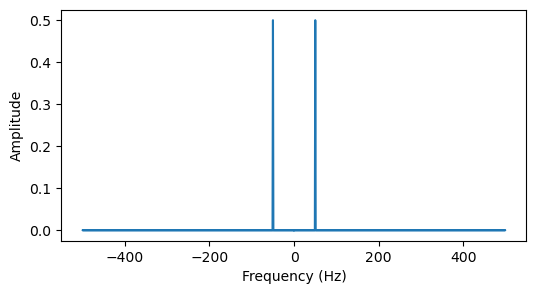

In [5]:
fig, ax = plt.subplots(figsize = [6, 3])
ax.set(ylabel = 'Amplitude', xlabel = 'Frequency (Hz)')
ax.plot(f, y)

If we plot the data as-is, we find that the amplitude of our original signal is split equally between the negative and positive frequency components of the FFT. To get the amplitude in just the positive frequency, we multiply by 2 to compensate for the equal split between negative/positive frequency, and we cut to just the first half of the data.

In [6]:
f, y = f[:N // 2], y[:N // 2] * 2

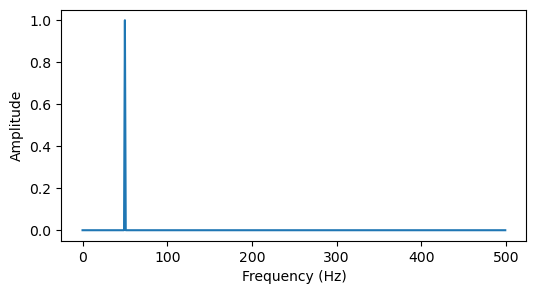

In [7]:
fig, ax = plt.subplots(figsize = [6, 3])
ax.set(ylabel = 'Amplitude', xlabel = 'Frequency (Hz)')
ax.plot(f, y)

Now we can put it all together into a function.

In [8]:
def simple_fft(tsample, x):
    N = len(x)
    f = np.fft.fftfreq(N, d = tsample)
    y = np.fft.fft(x)
    y = np.abs(y) / N
    f, y = f[:N // 2], y[:N // 2] * 2
    return f, y

Next, we will apply the FFT to the data we have generated at different sampling frequencies.

In [9]:
freq, y = simple_fft(1 / 1000, original_signal)
freq_nyquist, y_nyquist = simple_fft(1 / nyquist_rate, sampled_signal_nyquist)
freq_below_nyquist, y_below_nyquist = simple_fft(1 / below_nyquist_rate, sampled_signal_below_nyquist)
freq_above_nyquist, y_above_nyquist = simple_fft(1 / above_nyquist_rate, sampled_signal_above_nyquist)

And we can plot the results for each frequency.

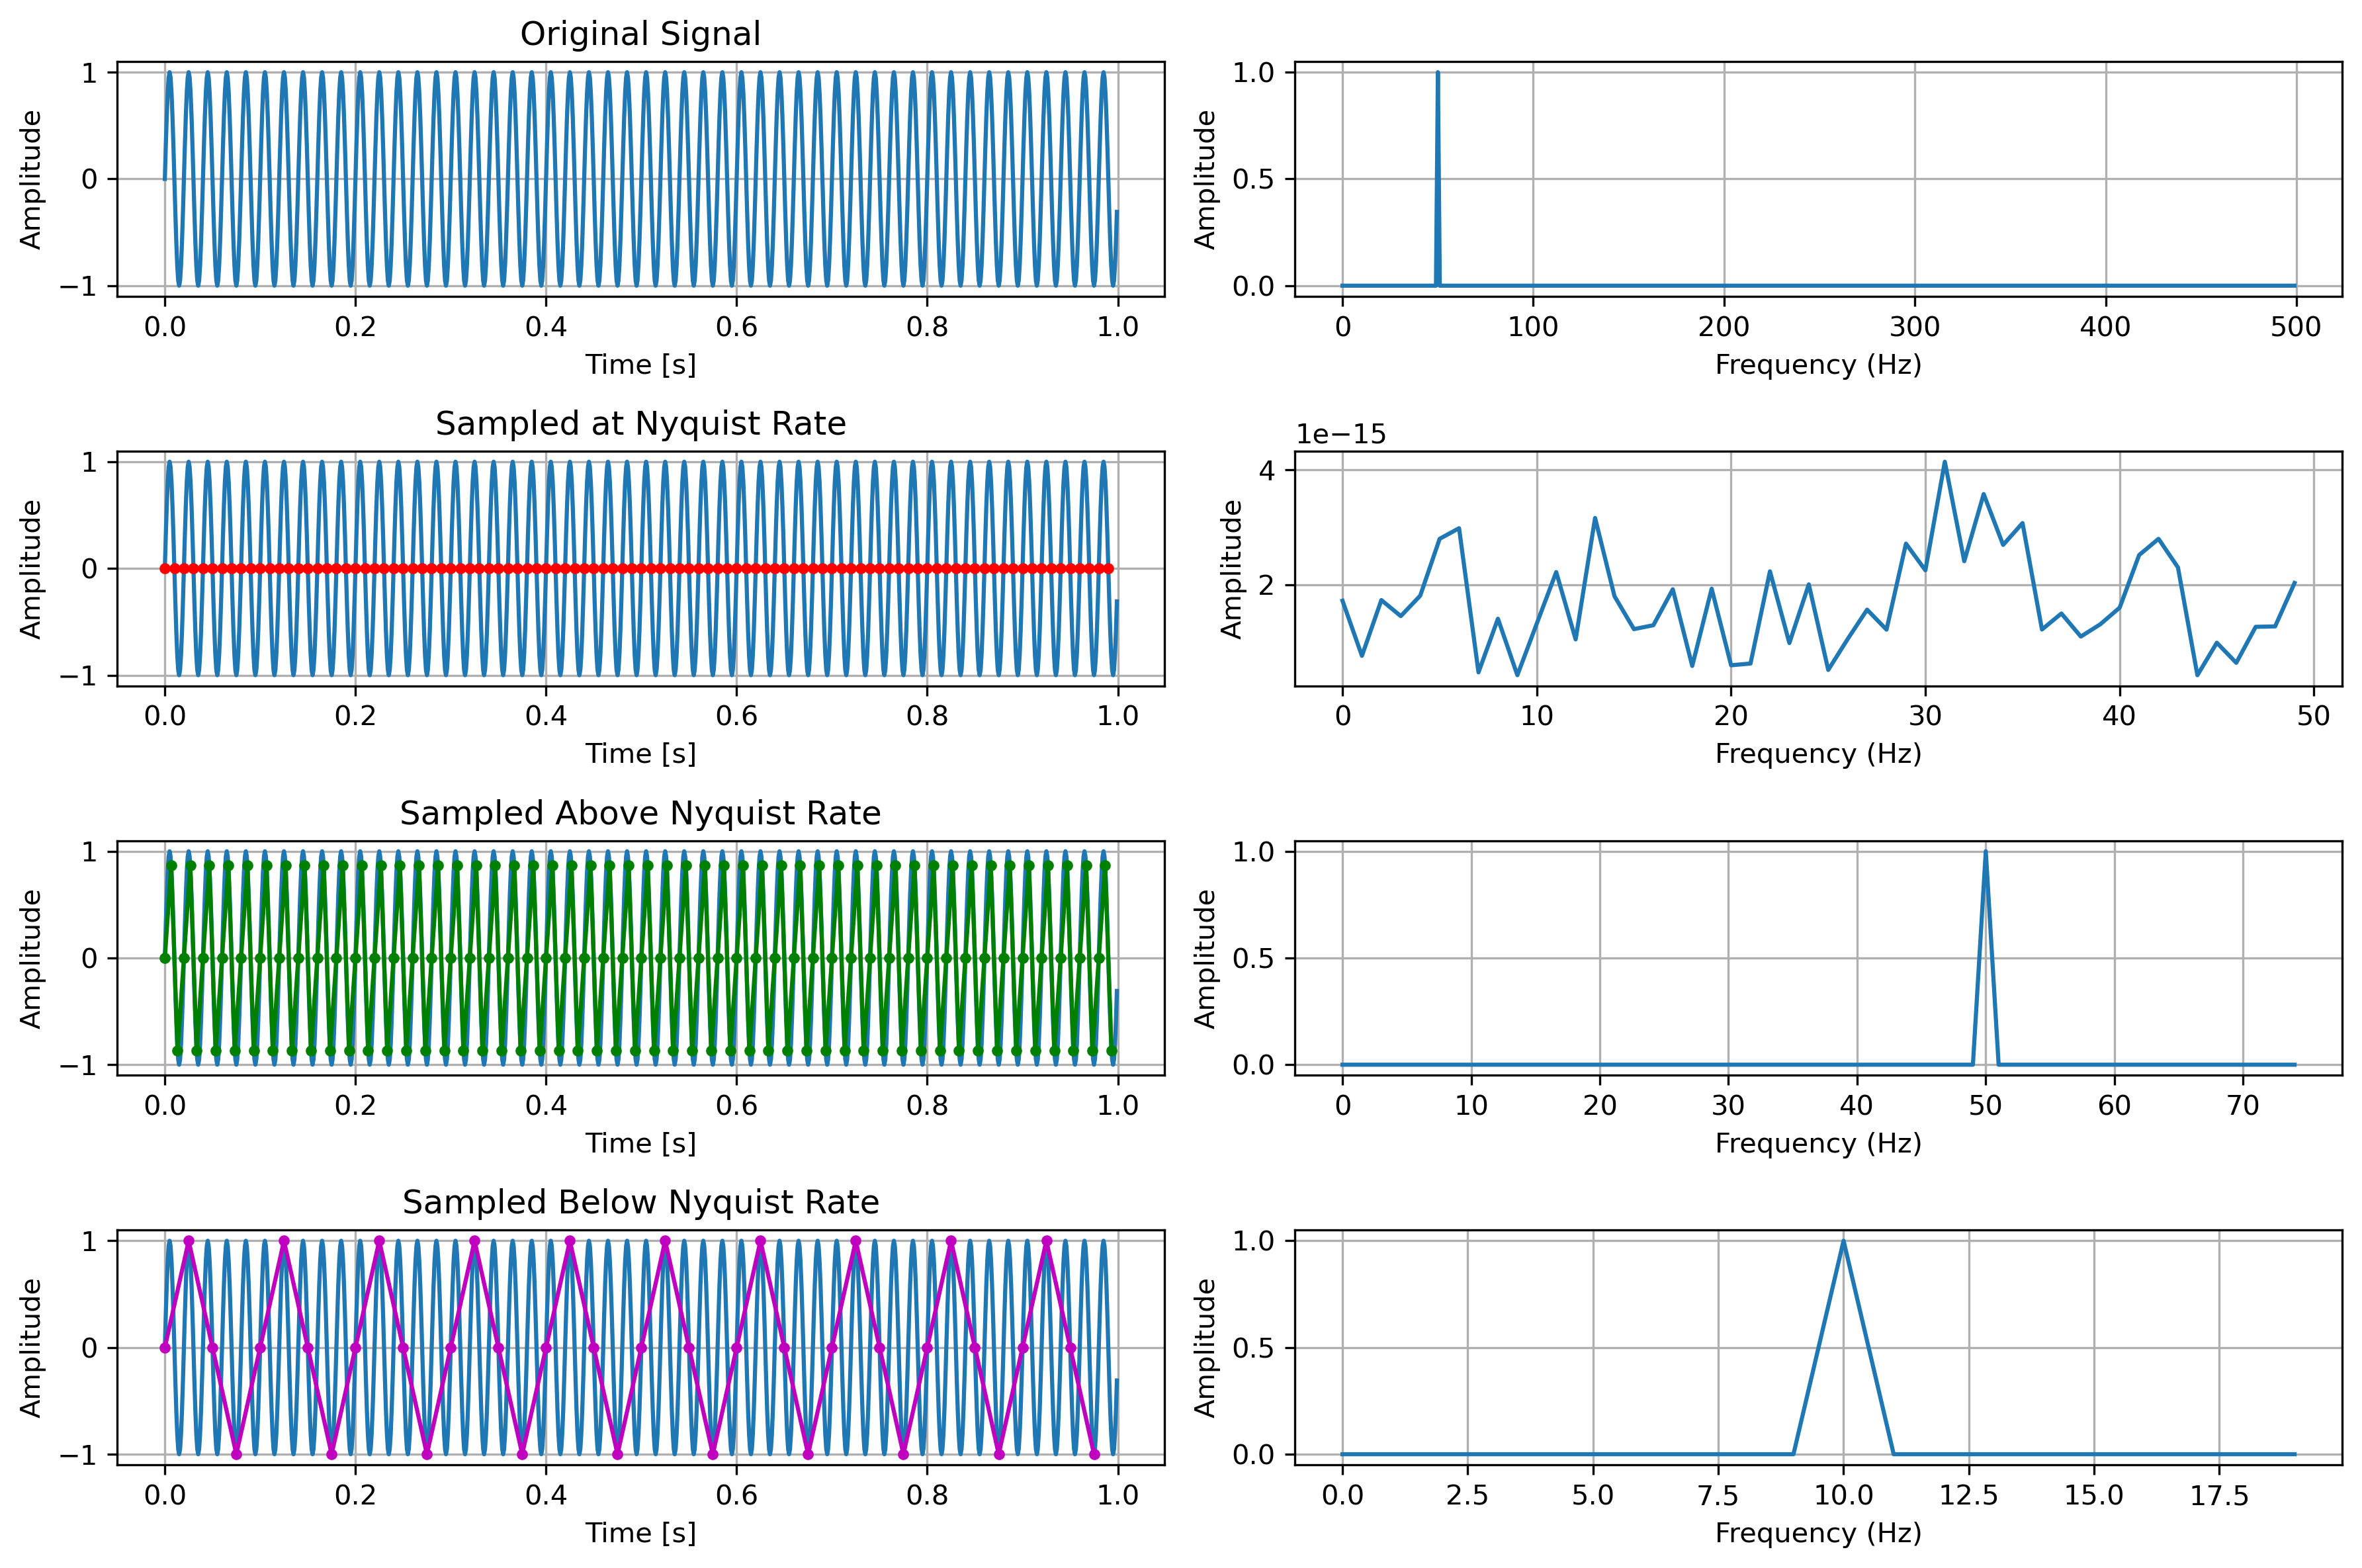

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(12, 8), dpi = 300, layout = 'tight')
for ax in axs[:, 0]:
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.grid()
for ax in axs[:, 1]:
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.grid()

axs[0, 0].plot(time, original_signal, label='Original Signal')
axs[0, 0].set_title('Original Signal')


# plt.subplot(4, 1, 2)
axs[1, 0].plot(time, original_signal, label='Original Signal')
axs[1, 0].plot(t_nyquist, sampled_signal_nyquist, '.-r', label='Sampled Signal (Nyquist Rate)')
axs[1, 0].set_title('Sampled at Nyquist Rate')

axs[2, 0].plot(time, original_signal, label='Original Signal')
axs[2, 0].plot(t_above_nyquist, sampled_signal_above_nyquist, '.-g', label='Sampled Signal (Above Nyquist Rate)')
axs[2, 0].set_title('Sampled Above Nyquist Rate')

axs[3, 0].plot(time, original_signal, label='Original Signal')
axs[3, 0].plot(t_below_nyquist, sampled_signal_below_nyquist, '.-m', label='Sampled Signal (Below Nyquist Rate)')
axs[3, 0].set_title('Sampled Below Nyquist Rate')

axs[0, 1].plot(freq, y)
axs[1, 1].plot(freq_nyquist, y_nyquist)
axs[2, 1].plot(freq_above_nyquist, y_above_nyquist)
axs[3, 1].plot(freq_below_nyquist, y_below_nyquist)

For the sampling above the Nyquist rate, we accurately extract the amplitude of 1 at the signal frequency of 50 Hz. When we are at the Nyquist rate, we extract no signal. When we are below the Nyquist rate, we extract a signal frequency that is lower than the actual signal. In this case, we sample a 50 Hz signal at 40 Hz, so we measure the signal at 10 Hz. 

# Nyquist frequency demonstration with slider
The following cell is an interactive plot where we can adjust the slider to see how the sampling changes as we change the sample frequency. You must have `ipywidgets` installed for this to work.

In [11]:
from ipywidgets import interact, SelectionSlider, Layout
import numpy as np
import matplotlib.pyplot as plt

def simple_fft(tsample, x):
    N = len(x)
    f = np.fft.fftfreq(N, d = tsample)
    y = np.fft.fft(x)
    y = np.abs(y) / N
    f, y = f[:N // 2], y[:N // 2] * 2
    return f, y
    
def plot_data(sample_freq):
    duration = 1
    frequency = 50
    time = np.arange(0, duration, 1 / 1000)
    original_signal = np.sin(2 * np.pi * time * frequency)
    t = np.linspace(0, duration, int(sample_freq * duration), endpoint=False)
    sampled_signal = np.sin(2 * np.pi * frequency * t)
    freq, y = simple_fft(1 / sample_freq, sampled_signal)
    fig, axs = plt.subplots(1, 2, figsize=(12, 2), dpi = 300, layout = 'tight')
    axs[1].set_xlabel('Time [s]')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid()
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid()
    axs[0].plot(time, original_signal, label='Original Signal')
    axs[0].plot(t, sampled_signal, '.-r', label='Sampled Signal (Nyquist Rate)')
    axs[0].set_title(f'Sampled at {sample_freq} Hz')
    axs[1].plot(freq, y)

sample_freq = 124

# Define slider options with markers
slider_options = [(f'{int(i)}', i) for i in np.arange(18, 1060, 1)]

# Create a SelectionSlider
slider = SelectionSlider(
    options=slider_options,
    value=60,
    description='Frequency:',
    layout=Layout(width='800px'),
    continuous_update = False
)
interact(plot_data, sample_freq = slider);

interactive(children=(SelectionSlider(continuous_update=False, description='Frequency:', index=42, layout=Layo…